We will create different models for General Category,OBC NCl category,SC category, ST category and then will deploying the final model we will use if clause that will check the caste of the student and on the basis of that the particular model will be triggered

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

In [2]:
#2021
df2021_round1=pd.read_excel("First_Round_Opening_Closing_Ranks.xlsx")
df2021_round2=pd.read_excel("Second_Round_Opening_Closing_Ranks.xlsx")
df2021_round3=pd.read_excel("Third_Round_Opening_Closing_Ranks.xlsx")

#2019
df2019_round1=pd.read_excel("JAM2019_cutoffRound1.xlsx",sheet_name="Table 2")
df2019_round2=pd.read_excel("JAM2019_cutoffRound2.xlsx",sheet_name="Table 2")
df2019_round3=pd.read_excel("JAM2019_cutoffRound3.xlsx",sheet_name="Table 1")
df2019_round32=pd.read_excel("JAM2019_cutoffRound3.xlsx",sheet_name="Table 2")



In [3]:
df2019_round1.head(3)

,ZoneName,CourseName,ourse-lD,Papers,Degree,Opening,Closing_gn,Opening.1,Closing_obc,Opening.2,...,Opening.3,Closing_st,Opening.4,Closing,Opening.5,Closing.1,Opening.6,Closing.2,Opening.7,Closing.3
0,llT BOMBAY,BlOTECHNOLOGY,1204,BT,M.SC,1,14,19,84,124,...,1345,1480,-,-,335,335,-,-,-,-
1,llT BOMBAY,ENVlRONMENTAL SClENCE AND ENGlNEERlNG,1213,BT,M.SC. - PH.D. DUAL DEGREE,46,46,227,227,-,...,-,-,-,-,-,-,-,-,-,-
2,llT KHARAGPUR,Molecular Medical Microbiology,1608,BT,JOlNT M.SC. - PH.D.,32,42,132,227,201,...,1194,1194,3319,3319,-,-,-,-,-,-


In [4]:
df2021_round1.head()

,Institute,Course,Program,Paper,Degree,Opening_gn,Closing_gn,Opening_gnews,Closing_gnews,Opening_obcncl,Closing_obc,Opening_sc,Closing_sc,Opening_st,Closing_st
0,IIT BOMBAY,BIOTECHNOLOGY,1204,BT,M.SC. (4 SEMESTERS),1,15,23,70,16,54,89,362,168,597
1,IIT BOMBAY,ENVIRONMENTAL SCIENCE AND\nENGINEERING,1213,BT,M.SC.-PH.D. DUAL DEGREE,38,38,94,94,83,83,-,-,-,-
2,IIT KHARAGPUR,MOLECULAR MEDICAL\nMICROBIOLOGY,1608,BT,JOINT M.SC. - PHD*,7,17,99,99,76,76,61,61,-,-
3,IIT INDORE,BIOTECHNOLOGY,2204,BT,M.SC. (4 SEMESTERS),18,26,72,74,57,68,385,390,685,685
4,IIT BOMBAY,CHEMISTRY,1205,CY,M.SC. (4 SEMESTERS),1,29,30,99,31,114,42,593,429,939


In [5]:
#Renaming some columns
df2019_round1=df2019_round1.rename(columns={"ZoneName":"Institute","CourseName":"Course"})
df2019_round2=df2019_round2.rename(columns={"ZoneName":"Institute","CourseName":"Course"})
df2019_round3=df2019_round3.rename(columns={"ZoneName":"Institute","CourseName":"Course"})

In [6]:
#Checking the number of IITs and the courses
print(f"The number of unique IITs participating in JAM is :- {len(df2021_round1['Institute'].unique())}")
print(f"The number of unique courses offered by IITs after JAM qualification is :- {len(df2021_round1['Course'].unique())}")

The number of unique IITs participating in JAM is :- 21
The number of unique courses offered by IITs after JAM qualification is :- 24


#### 2021

In [7]:
#Creating different DataFrames for different castes (Round1)
df2021_round1gn=df2021_round1[['Institute','Course','Closing_gn']]
df2021_round1obc=df2021_round1[['Institute','Course','Closing_obc']]
df2021_round1sc=df2021_round1[['Institute','Course','Closing_sc']]
df2021_round1st=df2021_round1[['Institute','Course','Closing_st']]
#Round2
df2021_round2gn=df2021_round2[['Institute','Course','Closing_gn']]
df2021_round2obc=df2021_round2[['Institute','Course','Closing_obc']]
df2021_round2sc=df2021_round2[['Institute','Course','Closing_sc']]
df2021_round2st=df2021_round2[['Institute','Course','Closing_st']]
#Round3
df2021_round3gn=df2021_round3[['Institute','Course','Closing_gn']]
df2021_round3obc=df2021_round3[['Institute','Course','Closing_obc']]
df2021_round3sc=df2021_round3[['Institute','Course','Closing_sc']]
df2021_round3st=df2021_round3[['Institute','Course','Closing_st']]

#### 2019

In [8]:
#Creating different DataFrames for different castes (Round1)
df2019_round1gn=df2019_round1[['Institute','Course','Closing_gn']]
df2019_round1obc=df2019_round1[['Institute','Course','Closing_obc']]
df2019_round1sc=df2019_round1[['Institute','Course','Closing_sc']]
df2019_round1st=df2019_round1[['Institute','Course','Closing_st']]
#Round2
df2019_round2gn=df2019_round2[['Institute','Course','Closing_gn']]
df2019_round2obc=df2019_round2[['Institute','Course','Closing_obc']]
df2019_round2sc=df2019_round2[['Institute','Course','Closing_sc']]
df2019_round2st=df2019_round2[['Institute','Course','Closing_st']]
#Round3
df2019_round3gn=df2019_round3[['Institute','Course','Closing_gn']]
df2019_round3obc=df2019_round3[['Institute','Course','Closing_obc']]
df2019_round3sc=df2019_round3[['Institute','Course','Closing_sc']]
df2019_round3st=df2019_round3[['Institute','Course','Closing_st']]

In [9]:
#Number of courses in differnt IITs
df2019_round1obc["Institute"].value_counts()

llT  BOMBAY            13
llT  BHUBANESWAR        7
llT  KHARAGPUR          6
llT  ROORKEE            5
llT  JODHPUR            3
llT  lNDORE             3
llT  DELHl              3
llT  KANPUR             3
llT  (lSM)  DHANBAD     3
llT  Bhilai             2
llT  PATNA              2
llT  HYDERABAD          2
llT  ROPAR              2
llT  GANDHlNAGAR        2
llT  MADRAS             2
llT GUWAHATl            2
llT  (BHU) Varanasi     1
llT  Palakkad           1
llT  Mandi              1
llT  Tirupati           1
Name: Institute, dtype: int64

In [10]:
#Number of courses in differnt IITs
df2021_round1obc["Institute"].value_counts()

IIT BOMBAY             16
IIT KHARAGPUR           9
IIT (ISM)\nDHANBAD      5
IIT INDORE              5
IIT KANPUR              5
IIT ROORKEE             5
IIT JODHPUR             5
IIT DELHI               4
IIT\nBHUBANESWAR        4
IIT MANDI               3
IIT TIRUPATI            3
IIT PALAKKAD            3
IIT BHILAI              3
IIT HYDERABAD           3
IIT PATNA               3
IIT ROPAR               3
IIT GANDHINAGAR         3
IIT MADRAS              3
IIT GUWAHATI            3
IIT (BHU)\nVARANASI     2
IIT BHUBANESWAR         1
Name: Institute, dtype: int64

Note:- All the year cutoffs will be merged with the 2021 cutoff

In [11]:
# Joining all the rounds for different castes
#2021
df2021_obc=pd.concat([df2021_round1obc,df2021_round2obc,df2021_round3obc,df2019_round1obc,
                      df2019_round2obc,df2019_round1obc],axis=0)

df2021_gn=pd.concat([df2021_round1gn,df2021_round2gn,df2021_round3gn,df2019_round1gn,
                     df2019_round2gn,df2019_round3gn],axis=0)

df2021_sc=pd.concat([df2021_round1sc,df2021_round2sc,df2021_round3sc,df2019_round1sc,
                     df2019_round2sc,df2019_round3sc],axis=0)

df2021_st=pd.concat([df2021_round1st,df2021_round2st,df2021_round3st,df2019_round1st,
                     df2019_round2st,df2019_round3st],axis=0)


In [12]:
#Resetting the index
df2021_obc=(df2021_obc.reset_index()).drop(columns=['index'])
df2021_gn=(df2021_gn.reset_index()).drop(columns=['index'])
df2021_sc=(df2021_sc.reset_index()).drop(columns=['index'])
df2021_st=(df2021_st.reset_index()).drop(columns=['index'])

In [13]:
#Dropping the entries with a null("-") value
itr=df2021_obc.shape[0]
for i in range(0,itr):
    if df2021_obc["Closing_obc"][i]=="-":
        df2021_obc=df2021_obc.drop([i],axis=0)

        
itr=df2021_gn.shape[0]
for i in range(0,itr):
    if df2021_gn["Closing_gn"][i]=="-":
        df2021_gn=df2021_gn.drop([i],axis=0)
 
        
itr=df2021_sc.shape[0]
for i in range(0,itr):
    if df2021_sc["Closing_sc"][i]=="-":
        df2021_sc=df2021_sc.drop([i],axis=0)
        
itr=df2021_st.shape[0]
for i in range(0,itr):
    if df2021_st["Closing_st"][i]=="-":
        df2021_st=df2021_st.drop([i],axis=0)


In [14]:
# The shape of the dataframes
print(f"The shape of General Data Frame is :- {df2021_gn.shape}")
print(f"The shape of OBC Data Frame is :- {df2021_obc.shape}")
print(f"The shape of SC Data Frame is :- {df2021_sc.shape}")
print(f"The shape of ST Data Frame is :- {df2021_st.shape}")

The shape of General Data Frame is :- (443, 3)
The shape of OBC Data Frame is :- (470, 3)
The shape of SC Data Frame is :- (418, 3)
The shape of ST Data Frame is :- (384, 3)


In [15]:
#Checking Null values
df2021_gn.isnull().sum()

Institute     0
Course        0
Closing_gn    0
dtype: int64

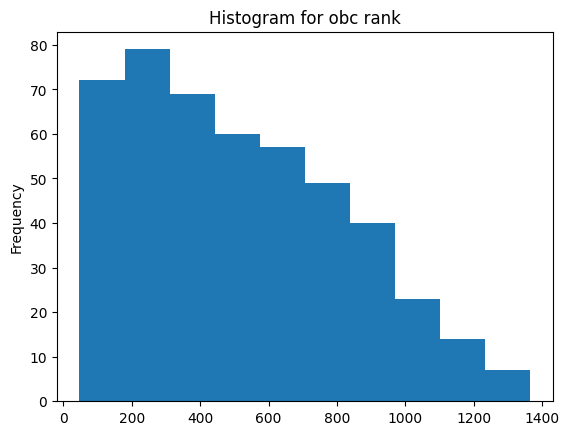

In [16]:
#Lets visualize the scores
data=df2021_obc["Closing_obc"]
data.plot(kind="hist")
plt.title("Histogram for obc rank")
plt.show()

In [17]:
# Creating target features and dependent features
#General
X_gn=df2021_gn.drop(columns='Institute')
y_gn=df2021_gn['Institute']
#OBC
X_obc=df2021_obc.drop(columns='Institute')
y_obc=df2021_obc['Institute']
#SC
X_sc=df2021_sc.drop(columns='Institute')
y_sc=df2021_sc['Institute']
#ST
X_st=df2021_st.drop(columns='Institute')
y_st=df2021_st['Institute']

In [18]:
#Uisng Column Transformer for using two feature engineering methods
#Gen
transformer_gen =ColumnTransformer([
    ("Onehot",OneHotEncoder(),['Course']),
    ("scalar",StandardScaler(),['Closing_gn'])
])
#OBC
transformer_obc =ColumnTransformer([
    ("Onehot",OneHotEncoder(),['Course']),
    ("scalar",StandardScaler(),['Closing_obc'])
])
#SC
transformer_sc =ColumnTransformer([
    ("Onehot",OneHotEncoder(),['Course']),
    ("scalar",StandardScaler(),['Closing_sc'])
])
#ST
transformer_st =ColumnTransformer([
    ("Onehot",OneHotEncoder(),['Course']),
    ("scalar",StandardScaler(),['Closing_st'])
])

In [19]:
#creating a pipeline to transform the data and fit the model
#Gen
pipe_gn=Pipeline([
    ('trans',transformer_gen),("clf",RandomForestClassifier())
])
#obc
pipe_obc=Pipeline([
    ('trans',transformer_obc),("clf",RandomForestClassifier())
])
#sc
pipe_sc=Pipeline([
    ('trans',transformer_sc),("clf",RandomForestClassifier())
])
#st
pipe_st=Pipeline([
    ('trans',transformer_st),("clf",RandomForestClassifier())
])

In [20]:
#Fitting the pipeline with X_train and y_train data
pipe_gn.fit(X_gn,y_gn)
pipe_obc.fit(X_obc,y_obc)
pipe_sc.fit(X_sc,y_sc)
pipe_st.fit(X_st,y_st)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('Onehot', OneHotEncoder(),
                                                  ['Course']),
                                                 ('scalar', StandardScaler(),
                                                  ['Closing_st'])])),
                ('clf', RandomForestClassifier())])

In [21]:

#Training accuracy
#gen
train_predgn=pipe_gn.predict(X_gn)
print(f"The training accuracy of General Category is : {accuracy_score(train_predgn,y_gn)}")
#obc
train_predobc=pipe_obc.predict(X_obc)
print(f"The training accuracy of OBC Category is : {accuracy_score(train_predobc,y_obc)}")
#SC
train_predsc=pipe_sc.predict(X_sc)
print(f"The training accuracy of SC Category is : {accuracy_score(train_predsc,y_sc)}")
#ST
train_predst=pipe_st.predict(X_st)
print(f"The training accuracy of ST Category is : {accuracy_score(train_predst,y_st)}")

The training accuracy of General Category is : 0.9119638826185101
The training accuracy of OBC Category is : 0.9127659574468086
The training accuracy of SC Category is : 0.861244019138756
The training accuracy of ST Category is : 0.8385416666666666


In [22]:
#df2021_obc["Course"].value_counts()

In [23]:
#Custom test dataframe
data={"Course":["PHYSICS"],"Closing_obc":[741]}
df_test=pd.DataFrame(data=data)
df_test

,Course,Closing_obc
0,PHYSICS,741


In [24]:
train_pred=pipe_obc.predict(df_test)

In [25]:
train_pred

array(['IIT INDORE'], dtype=object)

Writing a if clause to check the provided caste by the user and accordingly calling the required pipeline

In [26]:
Course="APPLIED GEOLOGY"
Caste="OBC"
Rank=98
if Caste=="GEN":
    data={"Course":[Course],"Closing_gn":[Rank]}
    df_test=pd.DataFrame(data)
    print(pipe_gn.predict(df_test))
elif Caste=="OBC":
    data={"Course":[Course],"Closing_obc":[Rank]}
    df_test=pd.DataFrame(data)
    print(pipe_obc.predict(df_test))
elif Caste=="SC":
    data={"Course":[Course],"Closing_gn":[Rank]}
    df_test=pd.DataFrame(data)
    print(pipe_sc.predict(df_test))
elif Caste=="ST":
    data={"Course":[Course],"Closing_gn":[Rank]}
    df_test=pd.DataFrame(data)
    print(pipe_st.predict(df_test))
    

['IIT ROORKEE']


In [38]:
#Dumping the pipelines
dump(pipe_gn,"pipe_gn.joblib")
dump(pipe_obc,"pipe_obc.joblib")
dump(pipe_sc,"pipe_sc.joblib")
dump(pipe_st,"pipe_st.joblib")

['pipe_st.joblib']